In [1]:
# data manipulation 
import numpy as np
import pandas as pd

# plots and graphs
import matplotlib.pyplot as plt

# function fit
from scipy.optimize import curve_fit

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# save output
import os
import csv

# Chapman-Richards Growth Function

In [2]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

### Pacific Maritime Data

#### Hemlock

In [3]:
# age
x_data_h = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_h = np.array([29.14, 119.32, 243.39, 329.07, 322.25, 231.83, 249.81, 259.46, 226.53, 197.34, 326.38])

In [4]:
#[250, 1, 0.1]

params_h, _ = curve_fit(growth_curve, x_data_h, y_data_h, [266.832207252662, 0.135649004115544, 47.0359862104518])
params_h

array([2.66833919e+02, 1.35630628e-01, 4.70098441e+01])

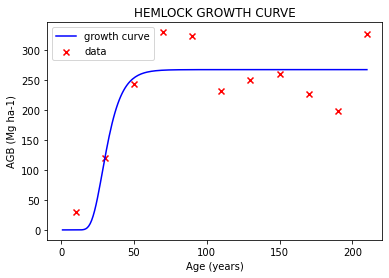

In [5]:
plt.scatter(x_data_h, y_data_h, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_h), 'b-', label='growth curve')

plt.title('HEMLOCK GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

#### Cedar & Other Conifers

In [6]:
# age
x_data_cc = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_cc = np.array([16.66, 91.81, 243.79, 258.67, 354.12, 285.51, 196, 198.16, 180.71, 142.52, 265.14])

In [7]:
# 20747.2558980855
params_cc, _ = curve_fit(growth_curve, x_data_cc, y_data_cc, [236.091242357912, 0.333343626361766, 17751.0235934541])
params_cc

array([2.36073501e+02, 4.24209789e-01, 3.17749539e+05])

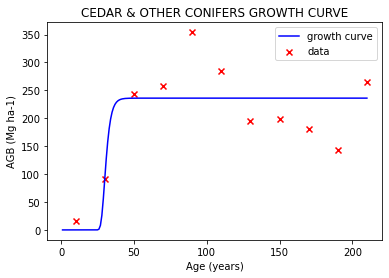

In [8]:
plt.scatter(x_data_cc, y_data_cc, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_cc), 'b-', label='growth curve')

plt.title('CEDAR & OTHER CONIFERS GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

#### Coastal Douglas-Fir

In [9]:
# age
x_data_cdf = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_cdf = np.array([19.18, 149.68, 278.83, 393.34, 431.07, 399.65, 447.97, 263.17, 339.13, 353.77, 402.94])

In [10]:
# [250, 0.5, 0.1]
params_cdf, _ = curve_fit(growth_curve, x_data_cdf, y_data_cdf, [379.034604967986, 0.0737257060569323, 8.35388453276221])
params_cdf

array([3.78949450e+02, 7.39687757e-02, 8.43143016e+00])

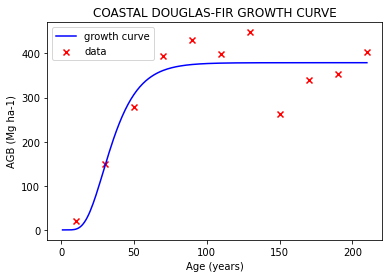

In [11]:
plt.scatter(x_data_cdf, y_data_cdf, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_cdf), 'b-', label='growth curve')

plt.title('COASTAL DOUGLAS-FIR GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

#### Amabilis Fir

In [12]:
# age
x_data_af = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_af = np.array([17.03, 66.89, 198.79, 137.92, 84.68, 155.24, 191.38, 195.36, 193.48, 174.57, 274.21])

In [13]:
params_af, _ = curve_fit(growth_curve, x_data_af, y_data_af, [178.096877858935, 0.264712577129793, 2697.01674471176])
params_af

array([1.78405845e+02, 4.41597711e-01, 5.56131174e+05])

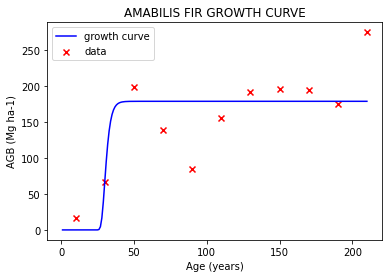

In [14]:
plt.scatter(x_data_af, y_data_af, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_af), 'b-', label='growth curve')

plt.title('AMABILIS FIR GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

#### Sitka Spruce

In [15]:
# age
x_data_sk = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_sk = np.array([0, 62.23, 331.7, 224.09, 519.52, 276.27, 247.52, 255.02, 341.27, 326.62, 452.78])

In [16]:
params_sk, _ = curve_fit(growth_curve, x_data_sk, y_data_sk, [330.911995874043, 0.252169068395704, 3193.38379126733])
params_sk

array([3.30606795e+02, 3.35112575e-01, 3.87938574e+04])

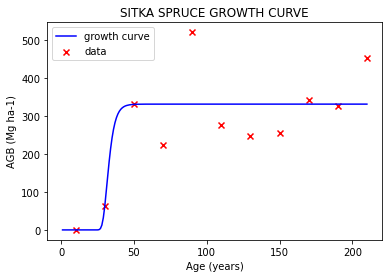

In [17]:
plt.scatter(x_data_sk, y_data_sk, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_sk), 'b-', label='growth curve')

plt.title('SITKA SPRUCE GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

### Washington Data

#### Hemlock / Sitka

In [18]:
# age
x_data_hs = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_hs = np.array([52.34, 179.87, 243.72, 240.58, 239.97, 268.77, 275.11, 346.75, 410.24, 365.98, 496.13])

In [19]:
params_hs, _ = curve_fit(growth_curve, x_data_hs, y_data_hs, [7886.10723058658, 0.000019281691966646, 0.479454377413846])
params_hs

array([3.79121588e+04, 1.73172114e-06, 5.65310918e-01])

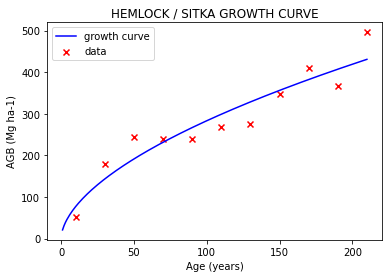

In [20]:
plt.scatter(x_data_hs, y_data_hs, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_hs), 'b-', label='growth curve')

plt.title('HEMLOCK / SITKA GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

#### Fir / Spruce / Mountain Hemlock

In [21]:
# age
x_data_fsm = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_fsm = np.array([29.15, 91.46, 126.46, 149.94, 162.66, 183.78, 220.71, 273.65, 304.81, 318.41, 436.59])

In [22]:
params_fsm, _ = curve_fit(growth_curve, x_data_fsm, y_data_fsm, [274869.928641769, 4.13964821568317E-06, 0.933425930916292])
params_fsm

array([7.22063028e+05, 1.47724621e-06, 9.33910483e-01])

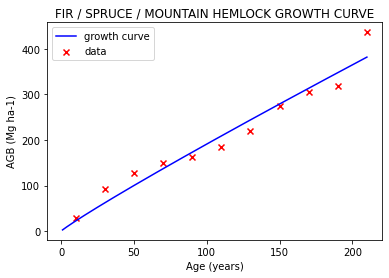

In [23]:
plt.scatter(x_data_fsm, y_data_fsm, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_fsm), 'b-', label='growth curve')

plt.title('FIR / SPRUCE / MOUNTAIN HEMLOCK GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

#### Coastal & Interior Douglas-Fir

In [24]:
# age
x_data_dfi = np.array([10,30,50,70,90,110,130,150,170,190,210])
# AGB
y_data_dfi = np.array([52.34, 179.87, 243.72, 240.58, 239.97, 268.77, 275.11, 346.75, 410.24, 365.98, 496.13])

In [25]:
params_dfi, _ = curve_fit(growth_curve, x_data_dfi, y_data_dfi, [9215.46768485293, 0.0000212284925046361, 0.565657070848123])
params_dfi

array([3.70175678e+04, 1.80618131e-06, 5.65300949e-01])

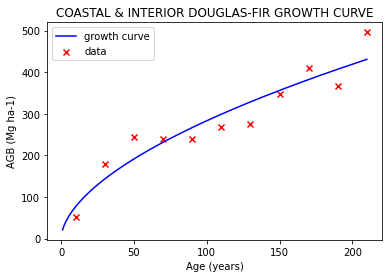

In [26]:
plt.scatter(x_data_dfi, y_data_dfi, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_dfi), 'b-', label='growth curve')

plt.title('COASTAL & INTERIOR DOUGLAS-FIR GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()